In [1]:
from collections import defaultdict
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle
from LUPI_evo import *

In [2]:
#Some code that implements progress bars for long computations
#https://www.mikulskibartosz.name/how-to-display-a-progress-bar-in-jupyter-notebook/
bar_length = 20
def update_progress(progress):
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
#Plotting function to pass to the animation function
# Animates single histogram
def update_hist(frame, data):

    #Extract info from data variable
    bins, counts = data

    #Clear the current plot
    plt.cla()

    #Set the axis ranges
    plt.ylim(0, 1.1)
    plt.gca().set_xticks(bins)

    #Plot the histogram
    plt.bar(bins, counts[frame], width=1) #width is the width of the bars

    #Add titles, labels, etc.
    plt.title("Average Player Strategy")
    plt.annotate("N = {}".format(3), xy=(0.8, 0.95), xycoords='axes fraction', fontsize=12)
    plt.annotate("Gen = {}".format(frame), xy=(0.8,0.9), xycoords='axes fraction', fontsize=12)


#Plotting function to pass to the animation function
# Plots histogram, mean, and std deviation
def update_hist_mean_std(frame, data):

    #Extract info from data variable
    p1s, means, std_devs = data
    xs = list(range(1, len(p1s)+1))

    #Clear the current plot
    plt.cla()
    plt.clf()

    #Plot the histogram
    plt.subplot(121)
    plt.hist(p1s[frame], bins=20, density=True, range=(0,1))
    plt.title("p_1 Distribution")
    plt.xlabel("p_1")
    plt.ylabel("Frequency")
    plt.annotate("N = {}".format(3), xy=(0.77, 0.96), xycoords='axes fraction', fontsize=8)
    plt.annotate("Gen = {}".format(frame), xy=(0.77,0.91), xycoords='axes fraction', fontsize=8)
    
    
    #Plot the graph of averages
    plt.subplot(222)
    plt.xlim((1,len(means)))
    plt.ylim((0, 1))
    plt.plot(xs[:frame], means[:frame])
    plt.title("Mean/Std_Dev (top/botom)")
    
    #Plot standard deviations
    plt.subplot(224)
    plt.xlim((1,len(std_devs)))
    plt.ylim((min(std_devs), max(std_devs)))
    plt.plot(xs[:frame], std_devs[:frame])
    plt.xlabel("Gen")

    plt.tight_layout()

In [4]:
#Generate Data
with open("data/sim_test.pk", 'rb') as file:
    data = pickle.load(file)

avg_dists = []
p1s = []
for players in data:
    strats = np.array([np.array(p.strat) for p in players])
    scores = np.array([p.score for p in players])
    avg = np.average(strats, 0, weights=(scores if not np.all(scores == 0) else None))
    avg_dists.append(avg)
    p1s.append([strat[0] for strat in strats])

In [5]:
#Get ready for Plotting

#Prepare bin labels and counts
bins = list(range(1,4))
counts = avg_dists

p1_means = [np.mean(x) for x in p1s]
p1_stds = [np.std(x) for x in p1s]

#Collect all the info the graphing function needs into one variable
data = (bins, counts)
data2 = (p1s, p1_means, p1_stds)

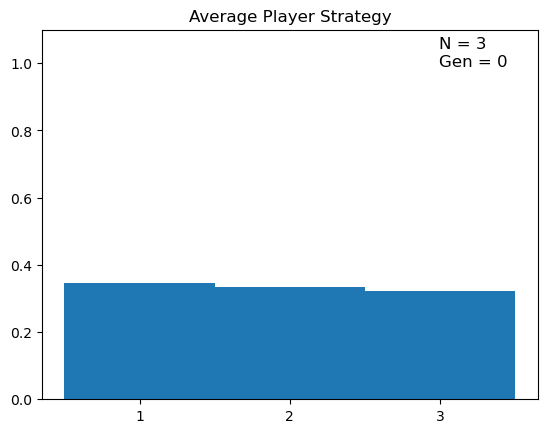

In [6]:
#Animate
fig = plt.figure()
video = animation.FuncAnimation(fig, update_hist, len(avg_dists), fargs=(data,))

#Save the animation
#Careful, running this code twice without changing the filename will overwrite the previous file!
video.save("animation.mp4")

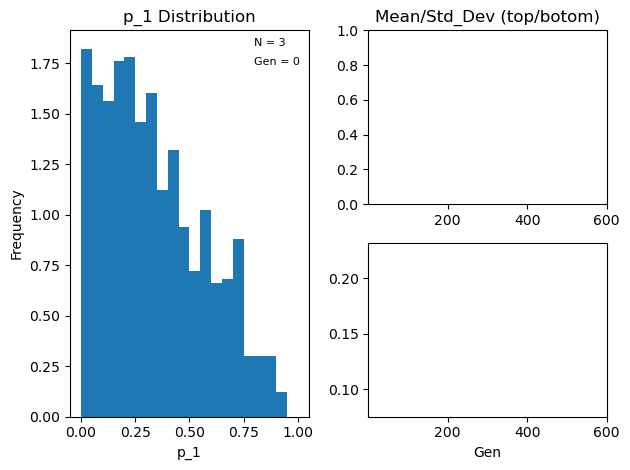

In [7]:
#Animate
fig = plt.figure()
video = animation.FuncAnimation(fig, update_hist_mean_std, len(avg_dists), fargs=(data2,))

#Save the animation
#Careful, running this code twice without changing the filename will overwrite the previous file!
video.save("animation2.mp4")

In [8]:
np.mean(p1s[0])

0.33692118066066923

(array([0.48048048, 1.37137137, 1.93193193, 1.8018018 , 1.57157157,
        1.11111111, 0.74074074, 0.61061061, 0.32032032, 0.06006006]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

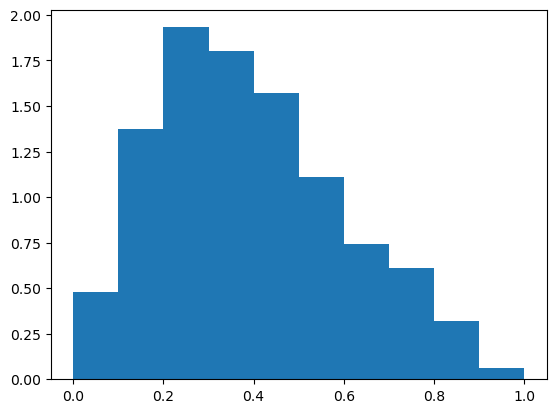

In [9]:
plt.hist(p1s[2], density=True, range=(0,1))